In [2]:
# pip install simpletransformers

In [3]:
from simpletransformers.language_representation import RepresentationModel
from simpletransformers.config.model_args import ModelArgs

In [7]:
from pathlib import Path

PATH_DATA = Path().resolve() / 'data'
PATH_DATA.mkdir(exist_ok=True)

PATH_DATA = PATH_DATA / 'Subjectivity_mining_assignment_3_4_data'

import pandas as pd

df_train_olid_small = pd.read_csv(PATH_DATA / 'olid-train-small.csv')
df_train_hasoc = pd.read_csv(PATH_DATA / 'hasoc-train.csv')
df_test_olid = pd.read_csv(PATH_DATA / 'olid-test.csv')

In [8]:
import torch.nn as nn
import torch
import torch.nn.functional as F

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [9]:
class LSTM(nn.Module):
    def __init__(self, n_d, hidden, n_class, bidirectional=False):
        super().__init__()
        self.lstm = nn.LSTM(
            n_d,
            hidden,
            bidirectional=bidirectional,
            batch_first=True
        )
        
        self.label = nn.Linear(
            hidden if not bidirectional else hidden * 2,
            n_class
        )
        self.hidden = hidden
        self.bidirectional = bidirectional
    
    def forward(self, x):
        _, (h_n, _) = self.lstm(x)
        if self.bidirectional:
            h_n = h_n.reshape(1, 1, self.hidden * 2)
        scores = self.label(h_n)
        labels = torch.sigmoid(scores)
        return labels

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

def create_confusion_matrix_plot(
    cf_matrix,
    model_name,
    embedding_model,
    setting
):
    if 'fBERT' in embedding_model:
        embedding_model = 'fBERT'
    elif 'hateBERT' in embedding_model:
        embedding_model = 'hateBERT'
    else:
        embedding_model = 'BERT'
    
    setting = setting[0].upper() + setting [1:]
    
    group_names = ['True Neg','False Pos','False Neg','True Pos']

    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(2,2)

    ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

    ax.set_title(f'{model_name} embedding {embedding_model}, {setting}\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['0','1'])
    ax.yaxis.set_ticklabels(['0','1'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

In [11]:
from tqdm.notebook import tqdm
import numpy as np 
from copy import deepcopy
import sklearn.metrics

In [16]:
df_train_hasoc[df_train_hasoc['labels'].isna()]

,id,text,labels
5628,hasoc_en_5629,@realDonaldTrump YOU'RE the biggest scandal in...,NaN


Some weights of the model checkpoint at diptanu/fBERT were not used when initializing BertForTextRepresentation: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForTextRepresentation from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTextRepresentation from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTextRepresentation were not initialized from the model checkpoint at diptanu/fBERT and are newly initialized: ['bert

TRAINING WITH EMBEDDINGS FROM diptanu/fBERT
SETTING in-domain


0it [00:00, ?it/s]

  0%|          | 0/5852 [00:00<?, ?it/s]

Epoch: 0, loss: 0.36725


  0%|          | 0/5852 [00:00<?, ?it/s]

Epoch: 1, loss: 0.31329


  0%|          | 0/5852 [00:00<?, ?it/s]

Epoch: 2, loss: 0.46098


  0%|          | 0/5852 [00:00<?, ?it/s]

Epoch: 3, loss: 0.31596


  0%|          | 0/5852 [00:00<?, ?it/s]

Epoch: 4, loss: 0.31407
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       620
           1       0.76      0.62      0.68       240

    accuracy                           0.84       860
   macro avg       0.81      0.77      0.79       860
weighted avg       0.83      0.84      0.83       860



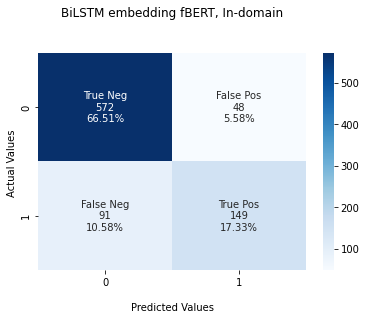

  0%|          | 0/5852 [00:00<?, ?it/s]

Epoch: 0, loss: 0.31465


  0%|          | 0/5852 [00:00<?, ?it/s]

Epoch: 1, loss: 1.26153


  0%|          | 0/5852 [00:00<?, ?it/s]

Epoch: 2, loss: 0.31399


  0%|          | 0/5852 [00:00<?, ?it/s]

Epoch: 3, loss: 0.31440


  0%|          | 0/5852 [00:00<?, ?it/s]

Epoch: 4, loss: 0.31334
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       620
           1       0.70      0.67      0.69       240

    accuracy                           0.83       860
   macro avg       0.79      0.78      0.78       860
weighted avg       0.83      0.83      0.83       860



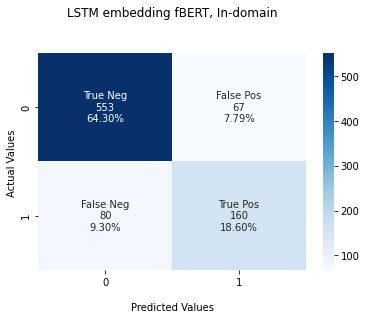

SETTING cross-domain


0it [00:00, ?it/s]

  0%|          | 0/5629 [00:00<?, ?it/s]

Epoch: 0, loss: 1.09476


  0%|          | 0/5629 [00:00<?, ?it/s]

Epoch: 1, loss: 0.35668


  0%|          | 0/5629 [00:00<?, ?it/s]

Epoch: 2, loss: 0.48416


  0%|          | 0/5629 [00:00<?, ?it/s]

Epoch: 3, loss: 0.31686


  0%|          | 0/5629 [00:00<?, ?it/s]

Epoch: 4, loss: 0.32311
              precision    recall  f1-score   support

           0       0.78      0.94      0.85       620
           1       0.67      0.33      0.44       240

    accuracy                           0.77       860
   macro avg       0.73      0.63      0.65       860
weighted avg       0.75      0.77      0.74       860



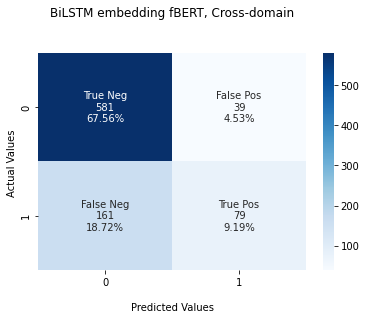

  0%|          | 0/5629 [00:00<?, ?it/s]

Epoch: 0, loss: 0.60567


  0%|          | 0/5629 [00:00<?, ?it/s]

Epoch: 1, loss: 0.33085


  0%|          | 0/5629 [00:00<?, ?it/s]

Epoch: 2, loss: 0.31812


  0%|          | 0/5629 [00:00<?, ?it/s]

Epoch: 3, loss: 1.29237


  0%|          | 0/5629 [00:00<?, ?it/s]

Epoch: 4, loss: 0.31737
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       620
           1       0.70      0.52      0.59       240

    accuracy                           0.80       860
   macro avg       0.77      0.72      0.73       860
weighted avg       0.79      0.80      0.79       860



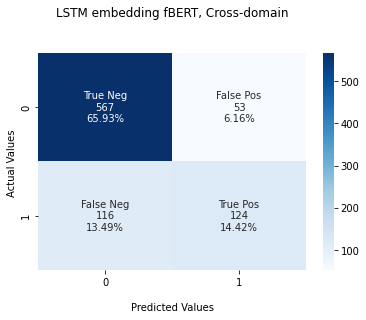

Some weights of the model checkpoint at GroNLP/hateBERT were not used when initializing BertForTextRepresentation: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForTextRepresentation from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTextRepresentation from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


TRAINING WITH EMBEDDINGS FROM GroNLP/hateBERT
SETTING in-domain


0it [00:00, ?it/s]

  0%|          | 0/5852 [00:00<?, ?it/s]

Epoch: 0, loss: 0.89584


  0%|          | 0/5852 [00:00<?, ?it/s]

Epoch: 1, loss: 0.31349


  0%|          | 0/5852 [00:00<?, ?it/s]

Epoch: 2, loss: 1.20944


  0%|          | 0/5852 [00:00<?, ?it/s]

Epoch: 3, loss: 0.31370


  0%|          | 0/5852 [00:00<?, ?it/s]

Epoch: 4, loss: 0.31387
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       620
           1       0.62      0.60      0.61       240

    accuracy                           0.79       860
   macro avg       0.73      0.73      0.73       860
weighted avg       0.78      0.79      0.78       860



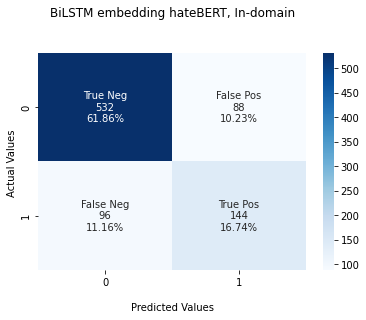

  0%|          | 0/5852 [00:00<?, ?it/s]

Epoch: 0, loss: 0.66751


  0%|          | 0/5852 [00:00<?, ?it/s]

Epoch: 1, loss: 0.68853


  0%|          | 0/5852 [00:00<?, ?it/s]

Epoch: 2, loss: 1.01800


  0%|          | 0/5852 [00:00<?, ?it/s]

Epoch: 3, loss: 0.33879


  0%|          | 0/5852 [00:00<?, ?it/s]

Epoch: 4, loss: 0.31331
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       620
           1       0.77      0.46      0.57       240

    accuracy                           0.81       860
   macro avg       0.79      0.70      0.73       860
weighted avg       0.80      0.81      0.79       860



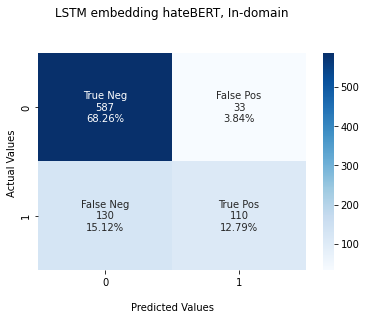

SETTING cross-domain


0it [00:00, ?it/s]

  0%|          | 0/5629 [00:00<?, ?it/s]

Epoch: 0, loss: 1.16214


  0%|          | 0/5629 [00:00<?, ?it/s]

Epoch: 1, loss: 0.32934


  0%|          | 0/5629 [00:00<?, ?it/s]

Epoch: 2, loss: 1.26941


  0%|          | 0/5629 [00:00<?, ?it/s]

Epoch: 3, loss: 0.33577


  0%|          | 0/5629 [00:00<?, ?it/s]

Epoch: 4, loss: 1.07591
              precision    recall  f1-score   support

           0       0.81      0.73      0.77       620
           1       0.44      0.55      0.49       240

    accuracy                           0.68       860
   macro avg       0.62      0.64      0.63       860
weighted avg       0.70      0.68      0.69       860



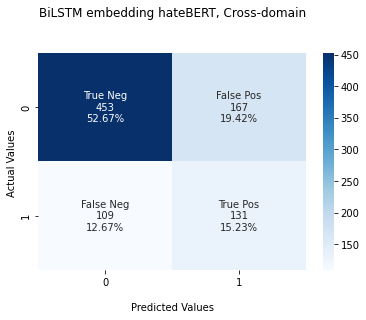

  0%|          | 0/5629 [00:00<?, ?it/s]

Epoch: 0, loss: 0.52789


  0%|          | 0/5629 [00:00<?, ?it/s]

Epoch: 1, loss: 1.09510


  0%|          | 0/5629 [00:00<?, ?it/s]

Epoch: 2, loss: 0.34690


  0%|          | 0/5629 [00:00<?, ?it/s]

Epoch: 3, loss: 0.34515


  0%|          | 0/5629 [00:00<?, ?it/s]

Epoch: 4, loss: 0.32783
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       620
           1       0.46      0.38      0.42       240

    accuracy                           0.70       860
   macro avg       0.62      0.60      0.61       860
weighted avg       0.69      0.70      0.69       860



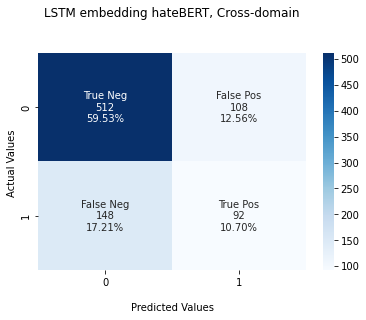

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTextRepresentation: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForTextRepresentation from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTextRepresentation from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

TRAINING WITH EMBEDDINGS FROM bert-base-uncased
SETTING in-domain


0it [00:00, ?it/s]

  0%|          | 0/5852 [00:00<?, ?it/s]

Epoch: 0, loss: 0.35244


  0%|          | 0/5852 [00:00<?, ?it/s]

Epoch: 1, loss: 0.33800


  0%|          | 0/5852 [00:00<?, ?it/s]

Epoch: 2, loss: 0.31615


  0%|          | 0/5852 [00:00<?, ?it/s]

Epoch: 3, loss: 0.32530


  0%|          | 0/5852 [00:00<?, ?it/s]

Epoch: 4, loss: 0.31346
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       620
           1       0.79      0.45      0.58       240

    accuracy                           0.81       860
   macro avg       0.80      0.70      0.73       860
weighted avg       0.81      0.81      0.80       860



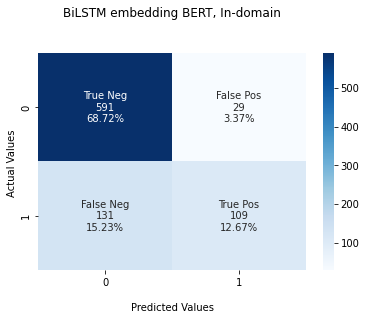

  0%|          | 0/5852 [00:00<?, ?it/s]

Epoch: 0, loss: 0.37012


  0%|          | 0/5852 [00:00<?, ?it/s]

Epoch: 1, loss: 1.18749


  0%|          | 0/5852 [00:00<?, ?it/s]

Epoch: 2, loss: 0.31354


  0%|          | 0/5852 [00:00<?, ?it/s]

Epoch: 3, loss: 0.32751


  0%|          | 0/5852 [00:00<?, ?it/s]

Epoch: 4, loss: 0.31329
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       620
           1       0.82      0.41      0.55       240

    accuracy                           0.81       860
   macro avg       0.81      0.69      0.71       860
weighted avg       0.81      0.81      0.79       860



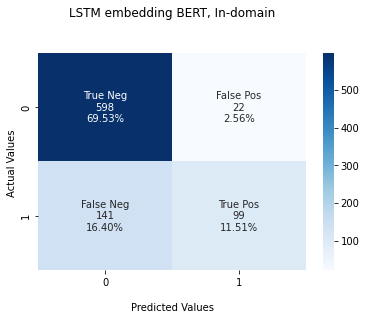

SETTING cross-domain


0it [00:00, ?it/s]

  0%|          | 0/5629 [00:00<?, ?it/s]

Epoch: 0, loss: 0.44597


  0%|          | 0/5629 [00:00<?, ?it/s]

Epoch: 1, loss: 0.48274


  0%|          | 0/5629 [00:00<?, ?it/s]

Epoch: 2, loss: 0.36653


  0%|          | 0/5629 [00:00<?, ?it/s]

Epoch: 3, loss: 1.29108


  0%|          | 0/5629 [00:00<?, ?it/s]

Epoch: 4, loss: 0.50568
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       620
           1       0.57      0.57      0.57       240

    accuracy                           0.76       860
   macro avg       0.70      0.70      0.70       860
weighted avg       0.76      0.76      0.76       860



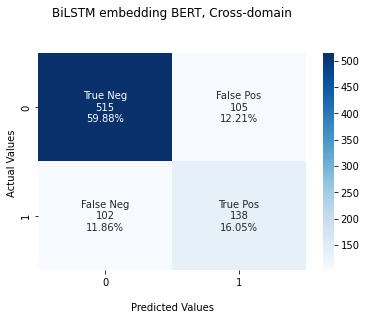

  0%|          | 0/5629 [00:00<?, ?it/s]

Epoch: 0, loss: 0.38868


  0%|          | 0/5629 [00:00<?, ?it/s]

Epoch: 1, loss: 0.63760


  0%|          | 0/5629 [00:00<?, ?it/s]

Epoch: 2, loss: 0.31892


  0%|          | 0/5629 [00:00<?, ?it/s]

Epoch: 3, loss: 0.94383


  0%|          | 0/5629 [00:00<?, ?it/s]

Epoch: 4, loss: 0.31377
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       620
           1       0.54      0.58      0.56       240

    accuracy                           0.75       860
   macro avg       0.69      0.70      0.69       860
weighted avg       0.75      0.75      0.75       860



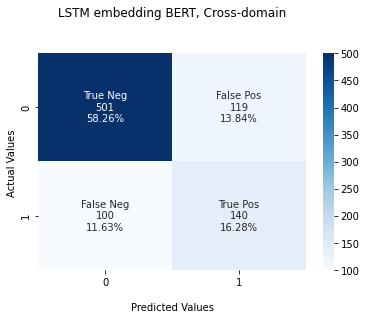

In [20]:
model_args = ModelArgs(max_seq_length=156)

for embedding_model in [
    "diptanu/fBERT",
    "GroNLP/hateBERT",
    "bert-base-uncased"
]:
    model = RepresentationModel(
        model_type="bert",
        model_name=embedding_model,
        use_cuda=True,
        args=model_args,
    )
    print('TRAINING WITH EMBEDDINGS FROM', embedding_model)
    
    for setting, train_data in [
        ('in-domain', df_train_olid_small),
        ('cross-domain', df_train_hasoc)
    ]:        
        print('SETTING', setting)
        
        # A copy is made of the train data to temporarily set the index to the id of the instance
        dff = deepcopy(train_data)
        
        # As the dataset is imbalanced, we compute a weighting for the loss function, to prevent 
        # all instances to be predicted as the majority class.
        weights = torch.tensor((
            dff.groupby('labels')[['id']].count().sum() /
            dff.groupby('labels')[['id']].count()
        ).values, device=device, dtype=torch.float32)
        weights[0] *= 1.4
        
        # Here we compute embeddings with static BERT models and save them in a dictionary with 
        # structure:
        # {
        #    '<id>': <vector>
        # }
        embs = {}
        for idx, row in tqdm(dff.iterrows()):
            emb = model.encode_sentences(
                [row['text']],
                combine_strategy=None
            )
            embs[row['id']] = torch.tensor(emb, device=device)
        
        
        dff = dff.set_index('id')
        ids = dff.index.unique().values
            
        for bidirectional, model_name in [
            (True, 'BiLSTM'),
            (False, 'LSTM')
        ]:
            # Instantiate LSTM model
            lstm = LSTM(n_d=768, hidden=500, n_class=2, bidirectional=bidirectional)
            lstm.to(device)

            # Set up a cross entropy loss function and Adam optimiser.
            # These are commonly chosen among deep learning applciations.
            criterion = torch.nn.CrossEntropyLoss(weight=weights.reshape(2))
            optimizer = torch.optim.Adam(lstm.parameters(), lr=1e-4)

            for epoch in range(5):
                # As we are doing stochastic gradient descent, we shuffle the order
                # of the IDs
                np.random.shuffle(ids)

                for id_ in tqdm(ids):
                    if id_ == 'hasoc_en_5629':
                      # This instance has no label
                      continue
                    
                    # Fetch label corresponding to the instance id to create tensor with true label
                    label = dff.loc[id_]['labels']
                    true = torch.tensor([label], device=device, dtype=torch.long)
                    # Fetch embedding
                    emb = embs[id_]
                    # Predict label with LSTM
                    pred = lstm(emb)[0]

                    lstm.zero_grad()
                    
                    # Compute loss
                    loss = criterion(pred, true)
                    
                    # Perform back-propagation
                    loss.backward()
                    optimizer.step()

                print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))
            
            ## Evaluate on test set
            y_pred = []
            # Compute embeddings for test set
            for idx, row in df_test_olid.iterrows():
                emb = model.encode_sentences(
                    [row['text']],
                    combine_strategy=None
                )
                y_pred.append(lstm(torch.tensor(emb, device=device)).argmax().item())
            
            # Create classification report
            print(sklearn.metrics.classification_report(
                y_true=df_test_olid['labels'],
                y_pred=y_pred
            ))
            
            # Create confusion matrix plot
            cf_matrix = sklearn.metrics.confusion_matrix( y_true=df_test_olid['labels'],
                y_pred=y_pred)

            create_confusion_matrix_plot(
                cf_matrix, 
                model_name=model_name, 
                embedding_model=embedding_model,
                setting=setting,
            )